# Phase 3: Feature Engineering
## Titanic Survival Prediction

**Goal:** Create new features from existing data to improve model performance

**Feature Engineering Techniques:**
1. Extract titles from names (Mr., Mrs., Miss., Master.)
2. Create FamilySize (SibSp + Parch + 1)
3. Create IsAlone (binary: traveling alone or with family)
4. Bin Age into groups (Child, Teen, Adult, Senior)
5. Bin Fare into groups (Low, Medium, High)
6. Encode categorical variables (Sex, Embarked, Title)

**Why Feature Engineering?**
- Raw data might not be in best format for ML models
- Combining features can reveal hidden patterns
- Proper encoding is required for ML algorithms

---
## 1. Setup and Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../data/train_cleaned.csv')
print(df.info)
print(df.describe())

<bound method DataFrame.info of      Survived  Pclass     Sex    Age  SibSp  Parch     Fare Embarked  HasCabin
0           0       3    male  22.00      1      0   7.2500        S         0
1           1       1  female  38.00      1      0  71.2833        C         1
2           1       3  female  26.00      0      0   7.9250        S         0
3           1       1  female  35.00      1      0  53.1000        S         1
4           0       3    male  35.00      0      0   8.0500        S         0
..        ...     ...     ...    ...    ...    ...      ...      ...       ...
886         0       2    male  27.00      0      0  13.0000        S         0
887         1       1  female  19.00      0      0  30.0000        S         1
888         0       3  female  21.75      1      2  23.4500        S         0
889         1       1    male  26.00      0      0  30.0000        C         1
890         0       3    male  32.00      0      0   7.7500        Q         0

[891 rows x 9 colum

---
## 2. Extract Titles from Names

**Why?** Titles reveal social status and gender information:
- Mr. = adult male
- Mrs. = married woman
- Miss. = unmarried woman
- Master. = young boy
- Dr., Rev., Col. = professionals/upper class

**Strategy:**
1. Extract title using string operations
2. Group rare titles into "Rare" category
3. Map titles to numbers for ML

In [3]:

df_original=pd.read_csv('../data/train.csv')
df['Name']=df_original['Name']

In [4]:
# Extract title from Name (it's between comma and period)
# Example: "Braund, Mr. Owen Harris" -> "Mr"
# Your code here:
# df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# print(df['Title'].value_counts())
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)
print(df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


<>:6: SyntaxWarning: invalid escape sequence '\.'
<>:6: SyntaxWarning: invalid escape sequence '\.'
C:\Users\moham\AppData\Local\Temp\ipykernel_32552\3283125953.py:6: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract('([A-Za-z]+)\.',expand=False)


In [5]:

df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Jonkheer','Capt','Sir','Don','Mme','Lady','Ms','Mlle'],'Rare',inplace=True)
print(df['Title'].value_counts())

Title
Mr        517
Miss      182
Mrs       125
Master     40
Rare       27
Name: count, dtype: int64


C:\Users\moham\AppData\Local\Temp\ipykernel_32552\3385227150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Jonkheer','Capt','Sir','Don','Mme','Lady','Ms','Mlle'],'Rare',inplace=True)


---
## 3. Create Family Features

**Hypothesis:** Family size affects survival
- Alone: Harder to survive (no help)
- Small family (2-4): Better survival (look after each other)
- Large family (5+): Harder to coordinate, may separate

In [6]:

 df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
 print(df['FamilySize'].value_counts().sort_index())

FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64


In [7]:
df['IsAlone']=(df['FamilySize']==1).astype(int)
print(df['IsAlone'].value_counts())

IsAlone
1    537
0    354
Name: count, dtype: int64


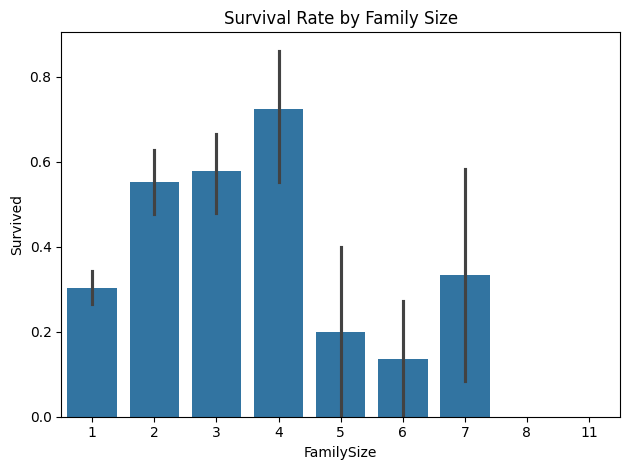

In [8]:
# Visualize: Does family size affect survival?
sns.barplot(data=df, x='FamilySize', y='Survived')
plt.title('Survival Rate by Family Size')
plt.tight_layout()
plt.show()

---
## 4. Create Age Groups

**Why bin Age?**
- ML models might find patterns in age ranges better than exact ages
- "Children" (0-12) had different survival than "Adults" (18-60)

**Age Bins:**
- Child: 0-12
- Teen: 13-17
- Adult: 18-60
- Senior: 60+

In [9]:
df['AgeGroup']=pd.cut(df['Age'],bins=[0,12,14,60,100],labels=['Child','Teen','Adult','Senior'])
print(df['AgeGroup'].value_counts())

AgeGroup
Adult     792
Child      69
Senior     22
Teen        8
Name: count, dtype: int64


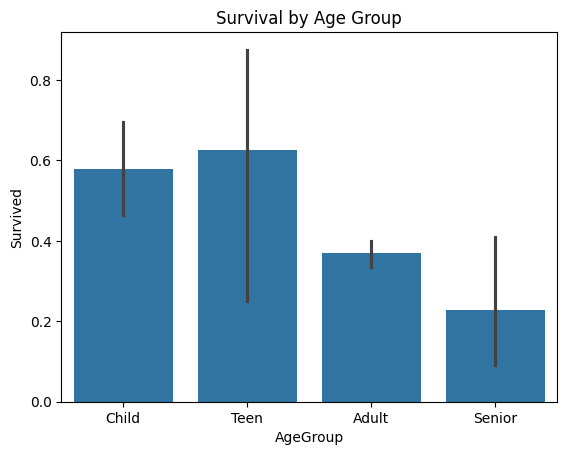

In [10]:
sns.barplot(data=df,x='AgeGroup',y='Survived')
plt.title("Survival by Age Group")
plt.show()

---
## 5. Create Fare Groups

**Why bin Fare?**
- Fare correlates with Pclass (ticket price)
- Group into Low/Medium/High buckets

In [11]:

df['FareGroup']=pd.cut(df['Fare'],bins=[0,8,32,120],labels=['Low','Medium','High'])
print(df['FareGroup'].value_counts())

FareGroup
Medium    439
Low       226
High      211
Name: count, dtype: int64


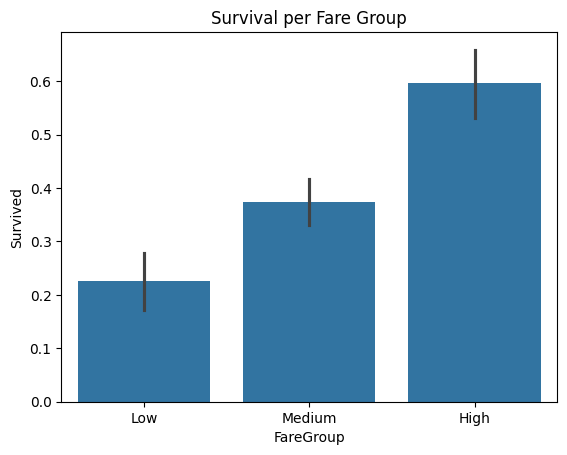

In [12]:
sns.barplot(data=df,x='FareGroup',y='Survived')
plt.title('Survival per Fare Group')
plt.show()

---
## 6. Encode Categorical Variables

**Why encode?**
- ML algorithms need numbers, not strings
- Two methods:
  1. **Label Encoding**: For binary or ordinal (Sex: male=1, female=0)
  2. **One-Hot Encoding**: For nominal with multiple categories (Embarked: C, Q, S)

In [13]:
# Label encode Sex (binary: male/female)
df['Sex']=df['Sex'].map({'male':1,'female':0})
print(df['Sex'].value_counts())

Sex
1    577
0    314
Name: count, dtype: int64


In [14]:
df=pd.get_dummies(df,columns=['Title'],prefix='Title',dtype=int)


In [15]:
df=pd.get_dummies(df,columns=['AgeGroup'],prefix='AgeGroup',dtype=int)

In [16]:
df=pd.get_dummies(df,columns=['FareGroup'],prefix='FareGroup',dtype=int)


In [17]:

df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=False,dtype=int)



---
## 7. Drop Unnecessary Columns

Now that we've extracted features, drop columns we don't need:
- Name (already extracted Title)
- SibSp, Parch (already created FamilySize, IsAlone)
- Age, Fare (already created AgeGroup, FareGroup - but you can keep originals too!)

In [18]:
df.drop(['Name','SibSp','Parch','Age','Fare'],axis=1,inplace=True)


---
## 8. Final Verification

Before saving, verify:
1. No missing values
2. All columns are numeric
3. Data types are correct

In [19]:
print(df.isnull().sum())

Survived            0
Pclass              0
Sex                 0
HasCabin            0
FamilySize          0
IsAlone             0
Title_Master        0
Title_Miss          0
Title_Mr            0
Title_Mrs           0
Title_Rare          0
AgeGroup_Child      0
AgeGroup_Teen       0
AgeGroup_Adult      0
AgeGroup_Senior     0
FareGroup_Low       0
FareGroup_Medium    0
FareGroup_High      0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
dtype: int64


In [20]:
print(df.dtypes)

Survived            int64
Pclass              int64
Sex                 int64
HasCabin            int64
FamilySize          int64
IsAlone             int64
Title_Master        int64
Title_Miss          int64
Title_Mr            int64
Title_Mrs           int64
Title_Rare          int64
AgeGroup_Child      int64
AgeGroup_Teen       int64
AgeGroup_Adult      int64
AgeGroup_Senior     int64
FareGroup_Low       int64
FareGroup_Medium    int64
FareGroup_High      int64
Embarked_C          int64
Embarked_Q          int64
Embarked_S          int64
dtype: object


In [ ]:

print(df.head())

   Survived  Pclass  Sex  HasCabin  FamilySize  IsAlone  Title_Master  \
0         0       3    1         0           2        0             0   
1         1       1    0         1           2        0             0   
2         1       3    0         0           1        1             0   
3         1       1    0         1           2        0             0   
4         0       3    1         0           1        1             0   

   Title_Miss  Title_Mr  Title_Mrs  ...  AgeGroup_Child  AgeGroup_Teen  \
0           0         1          0  ...               0              0   
1           0         0          1  ...               0              0   
2           1         0          0  ...               0              0   
3           0         0          1  ...               0              0   
4           0         1          0  ...               0              0   

   AgeGroup_Adult  AgeGroup_Senior  FareGroup_Low  FareGroup_Medium  \
0               1                0           

In [28]:

 print(df.corr()['Survived'].sort_values(ascending=False))

Survived            1.000000
Title_Mrs           0.339040
Title_Miss          0.327093
HasCabin            0.316912
FareGroup_High      0.244339
Embarked_C          0.168240
AgeGroup_Child      0.116691
Title_Master        0.085221
AgeGroup_Teen       0.047201
Title_Rare          0.022030
FamilySize          0.016639
Embarked_Q          0.003650
FareGroup_Medium   -0.020796
AgeGroup_Senior    -0.051224
AgeGroup_Adult     -0.088121
Embarked_S         -0.149683
FareGroup_Low      -0.189609
IsAlone            -0.203367
Pclass             -0.338481
Sex                -0.543351
Title_Mr           -0.549199
Name: Survived, dtype: float64


---
## 9. Save Engineered Data

Save the final dataset ready for modeling!

In [29]:
df.to_csv('../data/train_engineered.csv')
print("Engineered data saved to ../data/train_engineered.csv")

Engineered data saved to ../data/train_engineered.csv


---
## 10. Summary

**Feature Engineering Completed:**

✅ **New Features Created:**
- Title (extracted from Name)
- FamilySize (SibSp + Parch + 1)
- IsAlone (binary)
- AgeGroup (binned Age)
- FareGroup (binned Fare)

✅ **Encoding Done:**
- Sex: Label encoded (male=1, female=0)
- Title: one hot  encoded 
- AgeGroup:one hot encoded 
- FareGroup: one hot encoded 
- Embarked: One-hot encoded (3 binary columns)

✅ **Ready for Phase 4: Model Training!**

**Next Steps:**
1. Split data into train/validation sets
2. Try multiple ML algorithms (Logistic Regression, Random Forest, XGBoost)
3. Evaluate and compare models
4. Select best model for deployment